# PINGDINDSHAN'S NUMBER 


## PREIZKUŠANJE FUNKCIJ SAGEA

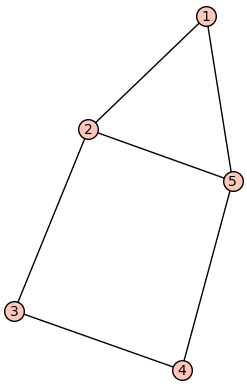

In [5]:
### Koda v Sage-u, ki izriše graf s 5 vozlišči in 6 povezavami

# Uvozim razred Graph iz SageMath-a
G = Graph()

# Dodam 5 vozlišč
G.add_vertices([1, 2, 3, 4, 5])

# Vozliščem dodam povezave
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (2, 5)]
G.add_edges(edges)

# Izrišem graf
G.show()
# dob bibuuerb

In [6]:
%%cython
# Hitrejsa razlicica stetja poti - ce ne deluje, odstrani zgornjo vrstico in glej spodaj se v funkciji pds!

from sage.combinat.combination import Combinations
from sage.rings.integer import Integer


def count_paths(G, start, end):
    """
    Presteje poti v neusmerjenem grafu ``G`` od ``start`` do ``end``.

    Koda je povzeta po ``sage.graphs.path_enumeration.all_paths``.
    """
    count_paths = Integer(0)
    act_path = []       # the current path
    act_path_iter = []  # the neighbor/successor-iterators of the current path
    s = start
    while True:
        if s == end:    # if path completes, add to count
            count_paths += Integer(1)
        else:
            if s not in act_path:   # we want vertices just once in a path
                act_path.append(s)  # extend current path
                act_path_iter.append(G.neighbor_iterator(s))  # save the state of the neighbor/successor-iterator of the current vertex
        s = None
        while s is None:
            try:
                s = next(act_path_iter[-1])  # try to get the next neighbor/successor, ...
            except (StopIteration):          # ... if there is none ...
                act_path.pop()               # ... go one step back
                act_path_iter.pop()
            if not act_path:                 # there is no other vertex ...
                return count_paths           # ... so we are done


def pds(G):
    """
    Presteje poti v neusmerjenem grafu ``G``.
    """
    count = G.order()
    for u, v in Combinations(G, 2):
        count += count_paths(G, u, v) # ce ne deluje s %%cython, zakomentiraj to in odkomentiraj naslednjo vrstico
        # count += len(G.all_paths(u, v))
    return count

In [12]:
pds(G)

37

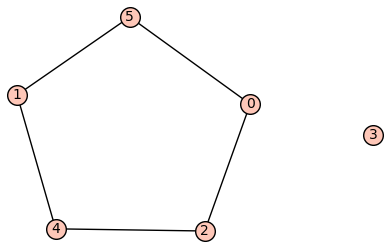

In [8]:
H = graphs.RandomGNM(6,5)
H.show()

In [9]:
pingdingshan(H)

NameError: name 'pingdingshan' is not defined

## VSI GRAFI

Spodaj je definirana funkcija ustvari_vse_grafe, ki ustvari vse povezane grafe na $1,...,12$ vozliščih. Funkcija vključi tudi vse izomorfne grafe.

In [ ]:
def ustvari_vse_grafe():
    from itertools import combinations
    vozlisca = [1, 2, 3, 4, 5, 6]
    vsi_povezani_grafi = []
    
    vse_mozne_povezave = list(combinations(vozlisca, 2))
    
    for r in range(len(vozlisca) - 1, len(vse_mozne_povezave) + 1):
        for edges in combinations(vse_mozne_povezave, r):
            G = Graph()
            G.add_vertices(vozlisca)
            G.add_edges(edges)
            
            if G.is_connected():
                vsi_povezani_grafi.append(G)
    
    return vsi_povezani_grafi

# Test kode
# povezani_grafi, st_povezanih = ustvari_vse_grafe()
# print(f"Število vseh povezanih grafov na 6 vozliščih je: {st_povezanih}")

In [14]:
# Funkcija, ki ustvari generatorje za vse grafe na i=1,...,12 vozliščih. Generator pomeni,
# da je v pomnilniku le navodilo za ustvarjanje grafa, ne pa celoten graf. Zaradi tega je 
# program hitrejši in porabi manj prostora na pomnilniku. Funkcija vrne 12 generatorjev,
# vsak naj bi vrnil vse grafe na i vozliščih ( en generator za vsak i)
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 13):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi()

[<generator object GraphGenerators.nauty_geng at 0x7efc6f3bed40>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a1e8180>,
 <generator object GraphGenerators.nauty_geng at 0x7efc6b9a7880>,
 <generator object GraphGenerators.nauty_geng at 0x7efc6b9a7ec0>,
 <generator object GraphGenerators.nauty_geng at 0x7efc6b9a7b00>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a464040>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a464180>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a4642c0>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a464400>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a464540>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a464680>,
 <generator object GraphGenerators.nauty_geng at 0x7efc7a4647c0>]

In [15]:
from sage.graphs.graph_generators import GraphGenerators

In [16]:
for G in GraphGenerators.all_graphs(3):
    show(G)

AttributeError: type object 'GraphGenerators' has no attribute 'all_graphs'

## DVODELNI GRAFI

In [17]:
# Funkcija, ki ustvari vse dvodelne grafe na i vozliščih, kjer i = 1, ..., 12.

def dvodelni_grafi():
    seznam_dvodelnih = []
    for i in range(1, 13):
        for k in range(0, i + 1):
            dvodelen_graf = graphs.CompleteBipartiteGraph(k, i - k)
            seznam_dvodelnih.append(dvodelen_graf)
    return seznam_dvodelnih

dvodelni = dvodelni_grafi()
len(dvodelni)


90

In [18]:
pds_dvodelni = {}
def st_poti(seznam_grafov):
    
    for G in seznam_grafov:
        st_vozlisc = len(G.vertices())
        if pds_dvodelni.get(st_vozlisc) is None:
            pds_dvodelni[st_vozlisc] = []
        pds_dvodelni[st_vozlisc] = pds_dvodelni[st_vozlisc].append(pds(G))
    return pds_dvodelni 


## GRAFI BREZ CIKLOV DOLŽINE TRI

Naslednja funkcija iz množice vseh grafov izbere tiste, ki ne vsebujejo trikotnikov oz. cikov dolžine 3. To stori za vse grafe z 1,...,12 vozlišči

In [ ]:
def grafi_brez_trikotnikov():
    seznam_brez_trikotnikov = []
    trikotnik = graphs.CycleGraph(3)
    for g in vsi_grafi:
        if g.subgraph_search(trikotnik) is None:
            seznam_brez_trikotnikov.append(g)
    return seznam_brez_trikotnikov
            
grafi_brez_trikotnikov = grafi_brez_trikotnikov()
        

In [21]:
def gen_grafi_brez_trikotnikov():
    gen_brez_trik = []
    for i in range(1,13):
        gen_brez_trik.append(graphs.nauty_geng(f"{i} -c -t"))
    return gen_brez_trik

grafi_brez_trikotnikov = gen_grafi_brez_trikotnikov()

Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 12 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [22]:
slovar_brez_trikotnikov = {
    1:[], 2:[], 3:[], 4:[], 5:[], 6:[],7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}

def pds_brez_trikotnikov():
    for gen in grafi_brez_trikotnikov:
        for g in gen:
            slovar_brez_trikotnikov[g.order()].append(pds(g))
    return slovar_brez_trikotnikov

pds_brez_trikotnikov= pds_brez_trikotnikov()

KeyboardInterrupt: 

## KUBIČNI GRAFI

Za kubične grafe velja, da imajo vsa vozlišča v takem grafu stopnjo natanko 3 (pravimo jim tudi 3-regularni grafi). Lastnost kubičnih grafov je tudi, da jih lahko dobimo le na sodo mnogo vozliščih. Spodnji funkciji služita generaciji teh grafov na i vozluščih za i=1,...,12 in šteju vseh poti na teh grafih.

In [ ]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(2,13,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()

In [23]:
for g in graphs.nauty_geng("6 -c -d3 -D3"):
    print(g.order())

6
6


In [24]:
slovar_kub_grafi = {
    2:[],4:[],6:[],8:[],10:[],12:[]}

def pds_kub_grafi():
    for gen in kub_grafi:
        for g in gen:
            slovar_kub_grafi[g.order()].append(pds(g))
    return slovar_kub_grafi

pds_kub_grafi= pds_kub_grafi()

NameError: name 'kub_grafi' is not defined

In [25]:
pds_kub_grafi

<function pds_kub_grafi at 0x7efc69ad1120>

### FILTRIRANJE GRAFOV IN ISKANJE MAKSIMALNE VREDNOSTI PDS(G)

In [26]:
# funkcija pogleda vsak graf iz množice vseh grafov, izračuna njegovo vrednost PDS(G), nato pa si ga zapomni, če je njegova PDS(G) vrednost 
# maksimalna v primerjavi z vrednostmi ostalih grafov

def max_pds():
    # prazen slovar, kamor bo funkcija shranjevala grafe z maksimalno vrednostjo PDS(G) in vrednost, ki jo dosežejo
    grafi_z_vrednostmi = {}
    # ta vrednost se bo vseskozi zanko večala
    max_vrednost = 0
    # iteracija čez vse grafe
    for G in ustvari_vse_grafe():
        # funkcija preveri katere vrste je graf in ga nato ustrezno zabeleži
        if G.is_bipartite():
            if pds(G) == max(max_vrednost, pds(G)):
                grafi_z_vrednostmi["dvodelen"] = (G, pds(G))
                # nastavim na novo vrednost
                max_vrednost = pds(G)
        # pogoj, ki preveri če ima graf kakšne trikotne cikle
        elif G.subgraph_search(Graph({1: [2, 3], 2: [3]})) is not None:
            if pds(G) == max(max_vrednost, pds(G)):
                grafi_z_vrednostmi["trikoten"] = (G, pds(G))
                max_vrednost = pds(G)
        # preveri če je graf kubičen
        elif G.is_regular(3):
            if pds(G) == max(max_vrednost, pds(G)):
                grafi_z_vrednostmi["kubicen"] = (G, pds(G))
                max_vrednost = pds(G)
        else:
            if pds(G) == max(max_vrednost, pds(G)):
                grafi_z_vrednostmi["ostalo"] = (G, pds(G))
                max_vrednost = pds(G)

    return grafi_z_vrednostmi



# klic funkcije
print(max_pds())

{'dvodelen': (Graph on 6 vertices, 141), 'trikoten': (Graph on 6 vertices, 981), 'ostalo': (Graph on 6 vertices, 56)}
